# Quantum Key Distribution Activity
### Authors: Amir Karamlou, Megan A Yamoah
The Coding School Quantum Computing | Summer 2020 \
Day 4: Thursday, July 16th 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from random import choice
from qiskit import execute, Aer, IBMQ, QuantumCircuit
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.compiler import transpile, assemble

from QKD_helpers import *
from qutip import *

### Set up IBM Q Account (FILL IN YOUR TOKEN HERE!)

In [2]:
# Loading your IBM Q account(s)
IBMQ.save_account("YOUR-API-TOKEN", overwrite=True) # replace YOUR-API-TOKEN with _your_ token from your IBM quantum experience account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='tcs-karamlou', project='summer-2020')

### Setting up some useful vectors and operators

Below, we are going to set up the basis vector we'll use down below.

In [3]:
# Set up basis vector
psi_0 = basis(2,0)

We should also set up some useful gates. We might not use all of them.

In [4]:
# Set up operators/gates
pauli_x = sigmax()
pauli_y = sigmay()
pauli_z = sigmaz()
hadamard = Qobj([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]])

## Review: Basis and Measurements

### Example

We can first make a single qubit circuit with the qubit in the $|0\rangle$ state

In [5]:
qc = QuantumCircuit(1,1) # First index determines the number of qubits
                         # Second index determines the number of classical bits (useful for measurement)
qc.reset(0) # reset our qubit to the |0> state
qc.draw()

q_0: ─|0>─
          
c_0: ═════

Here, we just initialized the qubit in the $|0\rangle$ state. That's enough.

Now we can visualize this on the Bloch sphere to remind ourselves what this looks like. 

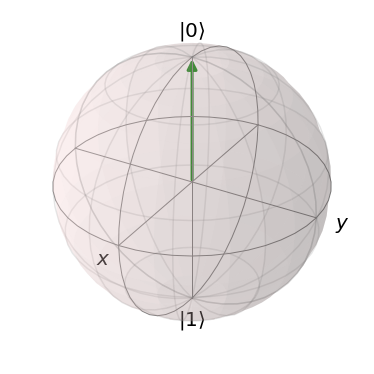

In [6]:
b = Bloch()
b.add_states(psi_0)
b.show()

### Your turn!

1.a. Make a single qubit circuit that puts the qubit into the $|1\rangle$ state. You'll have to add a gate.

In [7]:
qc = QuantumCircuit(1,1)
qc.reset(0) # reset our qubit to the |0> state

## add gate(s) here

qc.draw()

1.b. Now try to visualize this on the Bloch sphere.

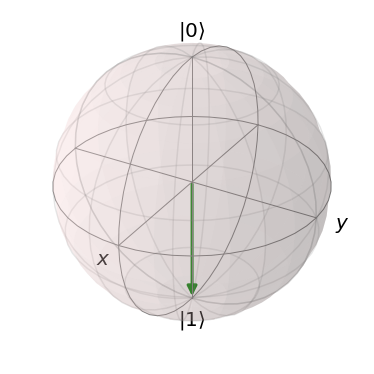

In [8]:
b = Bloch()

# final_state = [ADD OPERATOR(S) HERE] * psi_0

b.add_states(final_state)
b.show()

2.a Make a single qubit circuit that puts qubit into the $|+\rangle$ state

In [8]:
qc = QuantumCircuit(1,1)
qc.reset(0) # reset our qubit to the |0> state

## add gate(s) here: qc.'ADD_GATE_HERE'(0)

qc.draw()

2.b. Now try to visualize this on the Bloch sphere

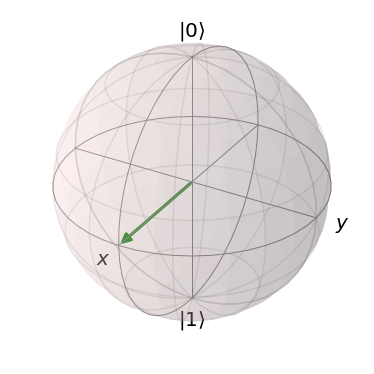

In [14]:
b = Bloch()

# final_state = [ADD OPERATOR(S) HERE] * psi_0

b.add_states(final_state)
b.show()

3.a. Make a single qubit circuit that puts qubit into the $|-\rangle$ state

In [9]:
qc = QuantumCircuit(1,1)
qc.reset(0) # reset our qubit to the |0> state

## add gate(s) here: qc.'ADD_GATE_HERE'(0)

qc.draw()

3.b. Now try to visualize this on the Bloch sphere.

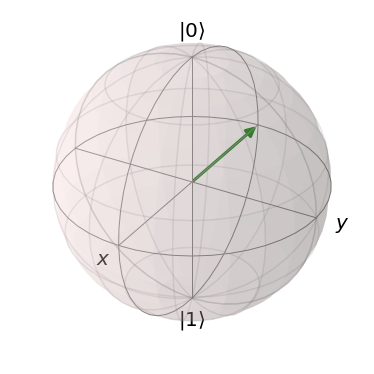

In [17]:
b = Bloch()

# final_state = [ADD OPERATOR(S) HERE] * psi_0

b.add_states(final_state)
b.show()

4. Now let's do a single measurement of a qubit put into the $|1\rangle$ state.

We'll use IBM hardware (an actual quantum computer), so we need to set that up below.

In [18]:
# Use the backend that is least busy to get access to the machine faster
from qiskit.providers.ibmq import least_busy

hard_backend = least_busy(provider.backends())
print(hard_backend)

It'll be helpful to first try our code with the simulator backend, which we define below.

In [19]:
sim_backend = Aer.get_backend('qasm_simulator')

Now we get to work. Add the gate that will put the qubit into the $|1\rangle$ state.

In [10]:
qc = QuantumCircuit(1,1)
qc.reset(0) # reset our qubit to the |0> state

## add gate(s) here: qc.'ADD_GATE_HERE'(0)

qc.measure(0,0)
print(qc)

results = execute(qc, backend=sim_backend, shots = 1000).result() ## CHANGE sim_backend to hard_backend when you're
                                                                   # ready to test on the real quantum computer
print('measurement result: ', results.get_counts())

5. Finally, use what we now know about basis and measurements to measure a mystery state in the X basis. (Hint: you should get $|1\rangle$ or '1' as the output of your measurement.)

In [11]:
qc = mystery_state_circuit() ## This sets up a QuantumCircuit with one qubit in a ~~mystery state

## add gate(s) here: qc.'ADD_GATE_HERE'(0)

qc.measure(0,0)

results = execute(qc, backend=sim_backend, shots = 1000).result() ## CHANGE sim_backend to hard_backend when you're
                                                                    # ready to test on the real quantum computer
print('measurement result: ', results.get_counts())

## QKD

Now let's try to implement the QKD algorithm! Ignore the fancy programming structure, let's just focus on the parts where we are going to add code.

In [12]:
# We define a bitstring length for all of our QKD functions
bitstring_length = 500

### Alice

In [13]:
class Alice():
    
    def __init__(self):
        self.bitstring=''
        self.basis=''
        self.key=''
        
    def send_qubits(self):
        ## Generate a list of quantum circuits that encodes a random bitstring using a random set of bases that Alice sends
        
        # Generate the bitsrting that Alice will encode
        self.bitstring = ''.join(choice('01') for i in range(bitstring_length))
        
        # Generate the basis that Alice uses to encode her bitstring. 
        # 0 means encode in the (0,1) basis and 1 means encode in the (+,-) basis
        self.basis = ''.join(choice('01') for i in range(bitstring_length))
        
        qubits = []
        # Hint: For every qubit make a seperate circuit, apply the proper gates and then append it to list 'qubits'
        
        ###############################
        ##
        ##
        ##
        ## INSERT YOUR CODE HERE
        ##
        ##
        ##
        ###############################
        
        return qubits
    
    def construct_key_from_indices(self, indices):
        for idx in indices:
            self.key += self.bitstring[idx]

### Bob

In [14]:
class Bob():
    def __init__(self):
        self.measured_bitstring=''
        self.basis=''
        self.key=''
        
    def measure_qubits(self, qubits, backend):
        # Perform measurement on the qubits send by Alice
        ## qubits: list of QuantumCircuits
        ## backend: IBMQ backend, either simulation or hardware
        
        # Generate the basis that Bob uses to measure the qubits. 
        # 0 means encode in the (0,1) basis and 1 means encode in the (+,-) basis
        self.basis = ''.join(choice('01') for i in range(bitstring_length))
        
        # For each qubit that Alice has sent:
        # set Bob's basis, measure, and append to his 'measured_bitstring'

        ###############################
        ##
        ##
        ##
        ## INSERT YOUR CODE HERE
        ##
        ##
        ##
        ###############################
        
            
    def construct_key_from_indices(self, indices):
        for idx in indices:
            self.key += self.measured_bitstring[idx]

In [15]:
def compare_and_make_key(alice, bob):
    
    indices = []
    
    for i in range(bitstring_length):
        if alice.basis[i] == bob.basis[i]:
            indices.append(i)

    alice.construct_key_from_indices(indices)
    bob.construct_key_from_indices(indices)

### Key Distribution Protocol

First, let's define Alice and Bob. We have to do this because of how we've set up the code.

In [16]:
# define Alice
alice = Alice()
# define Bob
bob = Bob()

Then, we make the exchange. Alice sends her qubits and Bob measures them.

In [20]:
# Alice prepares and sends her qubits to Bob
sent_qubits = alice.send_qubits()

# Bob measures the qubits
bob.measure_qubits(sent_qubits, sim_backend)

Now, they compare their basis strings and agree on a key

In [21]:
# Alice and Bob compare their basis and agree on a key
compare_and_make_key(alice, bob)

At this point, we have set Alice's and Bob's keys :)

### Secure communication

With their agreed on keys, we can implement some secure communication!

To implement secure communication, we'll need a binary adder. So, let's define that.

In [22]:
def binary_add(s, k):
    return str( (int(s)+int(k))%2 )

Now, let's first load up the secret message that Alice wants to send

In [23]:
# Load up the ~secret message (in bits)
secret_message = generate_secret_key()

1. Help Alice encode the secret message using her key:

In [24]:
# Alice encodes the secret message using her key
encoded_message = ''
for i in range(len(secret_message)):
    encoded_message += # Fill this out using the binary_add function above

Let's see what Alice sends to Bob

In [25]:
print("encoded bits: ", encoded_message)

If it was intercepted, Eve wouldn't be able to decode it. But, Bob can decode it with his key.

2.  Let's try:

In [26]:
# Bob decodes the secret message using his key
decoded_message = ''
for i in range(len(encoded_message)):
    decoded_message += # Fill this out using the binary_add function above

Now, Bob can translate his bits into a message!

In [27]:
# Let's see what does the message that Bob got from Alice say: 
text_from_bits(decoded_message)

Did he get it right?